In [1]:
import torch


In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../src')) # or the path to your source code
utils_path = os.path.abspath(os.path.join('../utils')) # or the path to your source code
sys.path.insert(0, module_path)
sys.path.insert(0, utils_path)

# Testing encoder

In [4]:
from models import ScaledDotProductAttention
import plot_utils

In [30]:
q = torch.normal(0, 1, (4, 1, 2))
k = torch.normal(0, 1, (4, 10, 2))
v = torch.normal(0, 1, (4, 10, 4))
valid_lens = torch.tensor([2, 6])

In [31]:
scaled_attention = ScaledDotProductAttention()
scaled_attention.eval()

ScaledDotProductAttention(
  (softmax): Softmax(dim=None)
)

In [32]:
scaled_attention(q, k, v)

/Users/haroonraja/Google Drive/Colab Notebooks/transformers/SequenceModeling/AttentionPaper/src/models.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  qk = self.softmax(torch.bmm(q, k.transpose(1, 2))/math.sqrt(q.shape[2]))


tensor([[[ 1.1532,  0.9321,  1.0694, -0.8122]],

        [[ 1.0608, -0.5015, -0.8771,  0.1084]],

        [[-0.4106, -0.6681,  0.4074,  0.3858]],

        [[-1.3171, -0.7369, -1.1915,  0.7087]]])

In [7]:
q.shape

torch.Size([2, 1, 2])

In [8]:
k.shape

torch.Size([2, 10, 2])

In [9]:
k.transpose(1, 2).shape

torch.Size([2, 2, 10])

In [10]:
import math

In [45]:
v_smax = torch.nn.Softmax(dim=-1)

In [46]:
v_smax(torch.bmm(q, k.transpose(1, 2))/math.sqrt(q.shape[2]))

tensor([[[0.1104, 0.0940, 0.1028, 0.0938, 0.1037, 0.1062, 0.0815, 0.0987,
          0.1274, 0.0814]],

        [[0.0401, 0.0648, 0.2431, 0.1939, 0.0310, 0.1498, 0.0321, 0.0176,
          0.1368, 0.0909]],

        [[0.0797, 0.1390, 0.0885, 0.2044, 0.0249, 0.1121, 0.1736, 0.0229,
          0.0057, 0.1492]],

        [[0.1475, 0.1227, 0.1748, 0.1662, 0.0822, 0.0373, 0.0690, 0.0497,
          0.0719, 0.0787]]])

In [29]:
v_smax.type

<bound method Module.type of Softmax(dim=2)>

In [1]:
import sys
sys.modules[__name__]

<module '__main__'>

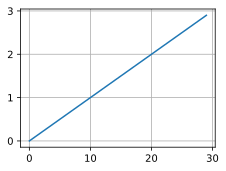

In [5]:
import numpy as np
plot_utils.plot(np.arange(0, 3, 0.1))